In [ ]:
%tensorflow_version 2.4.1

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.4.1`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
tflite_model_name = 'cifar_model'
c_model_name = 'cifar_model'

In [ ]:
# Import library
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [ ]:
# Import dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(x_test.shape)

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# No of class
import numpy as np
classes = np.unique(y_train)
print(classes)
print(classes.shape)
num_classes = classes.shape[0]
print(num_classes)

[0 1 2 3 4 5 6 7 8 9]
(10,)
10


In [ ]:
x_train[1].shape

(32, 32, 3)

In [ ]:
# Input vectoring
X_train = x_train.reshape(x_train.shape[0], 32, 32, 3) #RGB img => 3 channels
X_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing
X_train /= 255
X_test /= 255
#print(X_train[0])

# One hot encoding
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)
print(Y_train.shape)
Y_train


(50000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Building CNN Model
model = tf.keras.Sequential()






'''
#Small with accuracy 52%
model.add(layers.Conv2D(10, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='relu'))'''

'''
#Accuracy=69%
model.add(layers.Conv2D(10, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(25, activation='relu'))'''


'''
#Accuracy=70%
# Convolutional layer//50
model.add(layers.Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
#100
model.add(layers.Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# Pooling layer
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Convolutional//80
model.add(layers.Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# Pooling layer
model.add(layers.MaxPooling2D((2,2))) #Max pooling of 2x2

# Flatten the output
model.add(layers.Flatten())

# Fully connected layer/Hidden layers
model.add(layers.Dense(50, activation='relu'))  # Fully connected layer with 16 neurons
model.add(layers.Dense(30, activation='relu'))  # Fully connected layer with 16 neurons
model.add(layers.Dense(10, activation='relu'))
'''


model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.2))












# Output layer
model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer of 10 outputs

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [ ]:

# Compilation
'''from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)'''
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = 'adam')


In [ ]:
# Train model//10,100
#model.fit(X_train, Y_train, epochs=10, batch_size=500, validation_split=0.1)
history = model.fit(X_train, Y_train, epochs=20, batch_size=100, validation_split=0.1)

Epoch 1/20
450/450 [==============================] - 5s 9ms/step - loss: 2.0869 - accuracy: 0.2368 - val_loss: 1.3970 - val_accuracy: 0.4896
Epoch 2/20
450/450 [==============================] - 4s 8ms/step - loss: 1.3837 - accuracy: 0.4966 - val_loss: 1.0935 - val_accuracy: 0.6144
Epoch 3/20
450/450 [==============================] - 4s 8ms/step - loss: 1.1406 - accuracy: 0.5934 - val_loss: 0.9930 - val_accuracy: 0.6468
Epoch 4/20
450/450 [==============================] - 4s 8ms/step - loss: 0.9650 - accuracy: 0.6597 - val_loss: 0.8327 - val_accuracy: 0.7110
Epoch 5/20
450/450 [==============================] - 4s 8ms/step - loss: 0.8678 - accuracy: 0.6946 - val_loss: 0.7615 - val_accuracy: 0.7412
Epoch 6/20
450/450 [==============================] - 4s 8ms/step - loss: 0.7731 - accuracy: 0.7321 - val_loss: 0.6891 - val_accuracy: 0.7662
Epoch 7/20
450/450 [==============================] - 4s 8ms/step - loss: 0.6904 - accuracy: 0.7579 - val_loss: 0.6525 - val_accuracy: 0.7822
Epoch 

In [ ]:
(loss,accuracy)=model.evaluate(X_test,Y_test, batch_size=50,verbose=1)
accuracy*100


200/200 [==============================] - 1s 3ms/step - loss: 0.6609 - accuracy: 0.8063


80.62999844551086

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


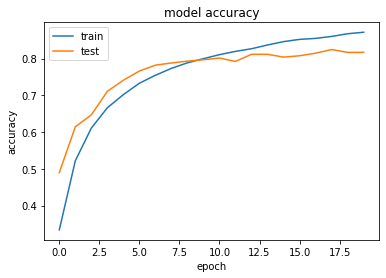

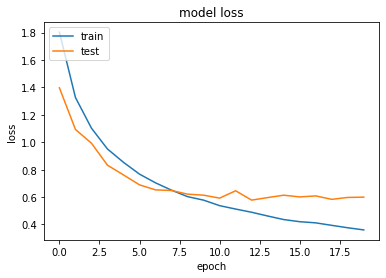

In [ ]:
print(history.history.keys())

#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2
Bird
array([0.29803923, 0.6666667 , 0.89411765, ..., 0.38039216, 0.73333335,
       0.9372549 ], dtype=float32)


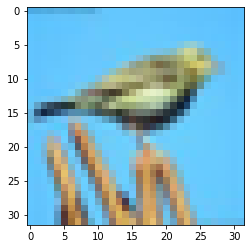

In [ ]:
#Real time testing
new_img = X_test[67,:,:]  
img = np.reshape(new_img, (1,32,32,3))
Y_pred = np.argmax(model.predict(img))
print(Y_pred)

obj=['Aeroplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truk']
print(obj[Y_pred])

import matplotlib.pyplot as plt
new_img1 = np.reshape(new_img,(32,32,3))
plt.imshow(new_img1)
print(repr (np.reshape(new_img,(32*32*3))))
#print(model.predict(img))


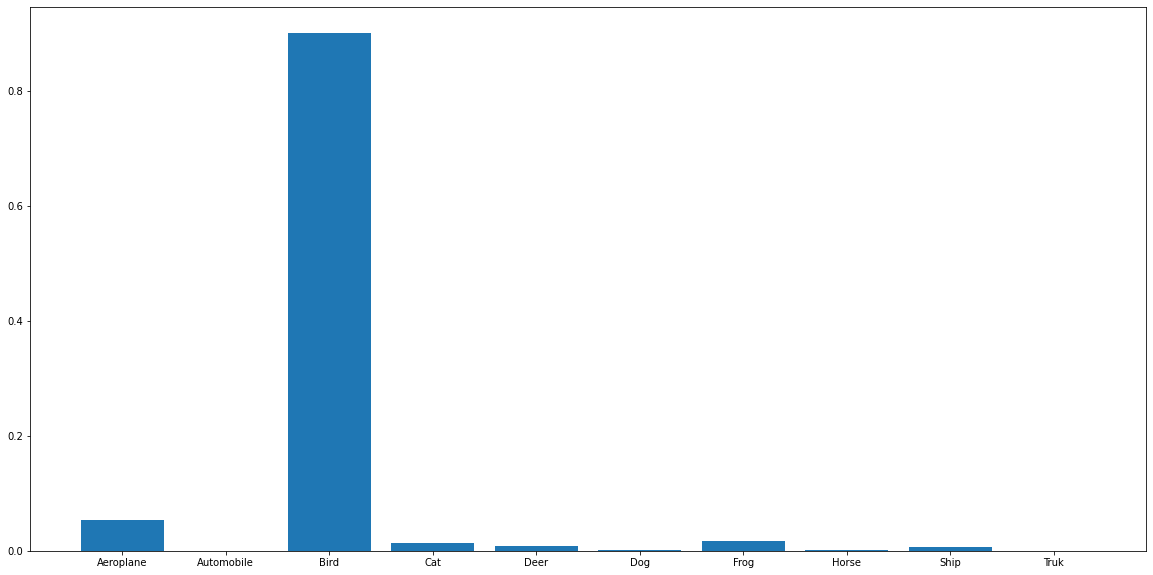

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(obj,model.predict(img)[0])

plt.show()

In [ ]:
# Convert Keras model to a tflite model

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open(tflite_model_name + '.tflite', "wb").write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmps7x_4ztx/assets


55056

In [ ]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str


# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))


In [ ]:

cfile = open(c_model_name + '.h')
cfile.read()

'#ifndef CIFAR_MODEL_H\n#define CIFAR_MODEL_H\n\n\nunsigned int cifar_model_len = 8888;\nunsigned char cifar_model[] = {\n 0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,\n  0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00,\n  0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,\n  0x18, 0x00, 0x00, 0x00, 0x2c, 0x00, 0x00, 0x00, 0xc8, 0x00, 0x00, 0x00,\n  0x2c, 0x00, 0x00, 0x00, 0x70, 0x00, 0x00, 0x00, 0x68, 0x00, 0x00, 0x00,\n  0x05, 0x00, 0x00, 0x00, 0x68, 0x05, 0x00, 0x00, 0x80, 0x04, 0x00, 0x00,\n  0xb0, 0x03, 0x00, 0x00, 0xd8, 0x02, 0x00, 0x00, 0x84, 0x01, 0x00, 0x00,\n  0x01, 0x00, 0x00, 0x00, 0xc0, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00,\n  0x54, 0x22, 0x00, 0x00, 0x50, 0x22, 0x00, 0x00, 0x3c, 0x21, 0x00, 0x00,\n  0xb0, 0x20, 0x00, 0x00, 0x1c, 0x20, 0x00, 0x00, 0xac, 0x1f, 0x00, 0x00,\n  0xcc, 0x0b, 0x00, 0x00, 0xac, 0x0a, 0x00, 0x00, 0x14, 0x06, 0x00, 0x00,\n  0x30, 0x22, 0x00, 0x00, 0x2c, 0x22, 0x00, 0x00, 0x28